# Predicting the heart disease using Machine learning

We are going to take the following approach
1. Problem defination
2. Data
3. Evalution
4. Featuring
5. Modeling
6. Experimentation

## 1. Problem defination

> Given clinical parameters about a patient, we have to predict a patient have heart disease or not.

## 2. Data

> The original data is coming from UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

## 3. Evalution

>if we reach 95% Accuracy to predicting wheather or not a person has heart disease or not, we will 
purse the project.

## 4. Features
> This is where you will get the information about the features. 

** Only 14 attributes used: **
> We take only those features which have significant effect on targated value.

1. #3 age: age in years
2. #4 sex: sex (1 = male; 0 = female)
3. #9 cp: chest pain type
*      Value 1: typical angina
*      Value 2: atypical angina
*      Value 3: non-anginal pain
*      Value 4: asymptomatic
4. #10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. #12 chol: serum cholestoral in mg/dl
6. #16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. #19 restecg: resting electrocardiographic results
*        Value 0: normal
*        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
*        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. #32 thalach: maximum heart rate achieved
9. #38 exang: exercise induced angina (1 = yes; 0 = no)
10. #40 oldpeak = ST depression induced by exercise relative to rest
11. #41 slope: the slope of the peak exercise ST segment
*         Value 1: upsloping
*         Value 2: flat
*         Value 3: downsloping
12. #44 ca: number of major vessels (0-3) colored by flourosopy
13. #51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. #58 num: diagnosis of heart disease (angiographic disease status)
*         Value 0: < 50% diameter narrowing
*         Value 1: > 50% diameter narrowing
*         (in any major vessel: attributes 59 through 68 are vessels)

## Preparing the Tools

#### We are going to use pandas, numpy , and matplotlib for data visualation and manipulation 

In [1]:
# importing the tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plot to appear inside the notebook
%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evalution
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Importing the data

In [2]:
df = pd.read_csv("6.1 heart-disease.csv")
df.shape

(303, 14)

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


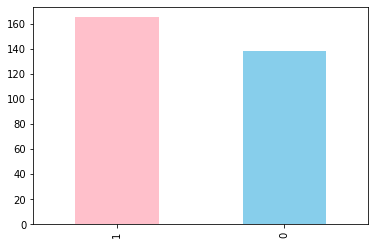

In [5]:
df['target'].value_counts().plot(kind='bar', color=['pink', 'skyblue']);

In [6]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## Heart disease Frequency according to sex

In [9]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# compare target column with sex column

pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


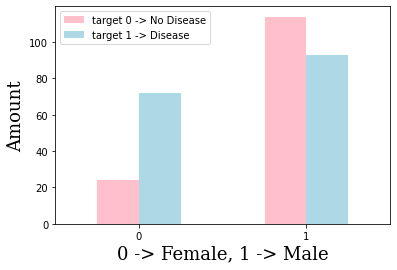

In [11]:
# create plot of crosstab

pd.crosstab(df.sex, df.target).plot(kind='bar', color=['pink', 'lightblue']);
plt.xlabel('0 -> Female, 1 -> Male', fontname="serif", fontsize=18);
plt.ylabel('Amount',fontname='serif' ,fontsize=18);
plt.xticks(rotation=0);
plt.legend(['target 0 -> No Disease', 'target 1 -> Disease']);

## Age v/s Max heart rate for heart disease

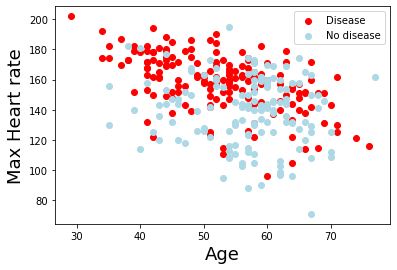

In [12]:
# scatter with heart disease
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color='red')
plt.xlabel('Age', fontsize=18)
plt.ylabel('Max Heart rate', fontsize=18)

#scatter with not heart disease
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c='lightblue');

plt.legend(['Disease', 'No disease']);

## Heart disease frequency per chest pain
cp: chest pain type
* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic

In [13]:
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


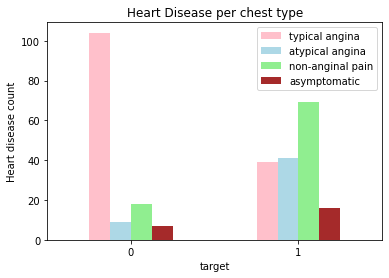

In [14]:
pd.crosstab(df.target, df.cp).plot(kind='bar', color=['pink', 'lightblue', 'lightgreen', 'brown']);
plt.legend(['typical angina','atypical angina','non-anginal pain','asymptomatic']);
plt.title('Heart Disease per chest type');
plt.ylabel('Heart disease count');
plt.xticks(rotation=0);

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


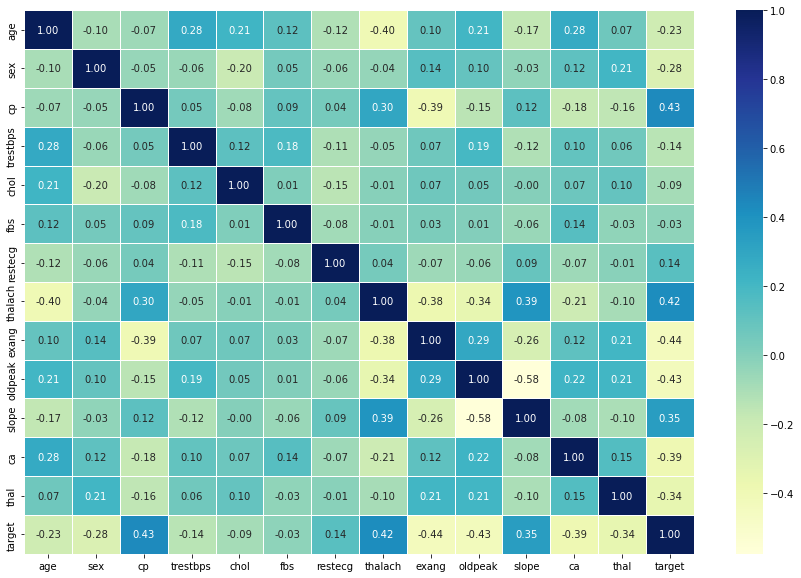

In [17]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt=".2f", cmap="YlGnBu");
# positive correlation = a relationship between two variable in which one increase as the other increase.
# Negative correlation = a relationship between two variable in which one increase as the other decrease.

# 5. Modeling

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# Spplit data into x and y axis
np.random.seed(42)
x = df.drop('target', axis=1)
y = df['target']

In [20]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
#split data in train and test set
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


 >We are going to try 3 different machine learning models
>1. Logistic Regression
>2. K-Nearest Neighbour Classifier
>3. Random Forest classifier

In [23]:
# Put models in dictionary 

models = {'logistic regression':LogisticRegression(),
          'KNN':KNeighborsClassifier(),
          'randomforest':RandomForestClassifier()}

# create a function to fit and score models
def fit_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for name, models in models.items():
        models.fit(x_train, y_train)
        
        model_scores[name] = models.score(x_test, y_test)
        
    return model_scores    
    
    
    
    
    

In [24]:
model_scores = fit_score(models=models,
                         x_train = x_train,
                         x_test =  x_test,
                         y_train = y_train,
                         y_test = y_test)
model_scores

C:\ethernet\miniconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'randomforest': 0.8360655737704918}

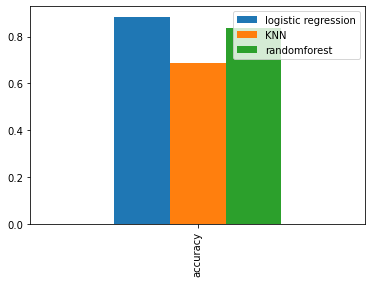

In [25]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.plot.bar();

### Lets looks at the following
>1. hyperparameters tunning
>2. Features Importance
>3. Classification report
>4. F1 score
>5. Accuracy
>6. confusion_matrix
>7. Cross validation
>8. precision
>9. ROC curve
>10. Area under curve (AUC)

## Hyperperameter Tunning

In [26]:
# Let's tune KNN
train_scores = []
test_scores = []

# create a list of different neighbours
neighbors = range(1,21)

knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # update the training score list
    train_scores.append(knn.score(x_train, y_train))
    
    # update the test score list
    test_scores.append(knn.score(x_test, y_test))

In [27]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [28]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [29]:
y = max(test_scores)
print(f"The maximum score of KNN is {y*100}")

The maximum score of KNN is 75.40983606557377


## Hyperparameters tunning with RandomizedSeacrhCV

### Hyperparameters tunning of:
* LogisticRegression Classifier()
* RandomforestClassifier()

In [30]:
#create a hyperparameter grid for logisticRegression
log_reg = {"C": np.logspace(-4,4,20),
           "solver": ["liblinear"]}

# create a hyperparameter grid for RandomForestClassifier
rf_reg = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None, 3,5,10],
          "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [31]:
np.random.seed(42)

# Set up Random Hyperparameters search for LogisticRegression
rs_reg = RandomizedSearchCV(LogisticRegression(),
                            param_distributions=log_reg,
                            cv = 5,
                            n_iter = 20,
                            verbose = True)
# Fit Random Hyperparameters search model for LogisticRegression
rs_reg.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
rs_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
rs_reg.score(x_test, y_test)

0.8852459016393442

### Now we have tuned logisticregression(), let's do the same for RandomForestClassifier

In [34]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_reg,
                           cv=5,
                           n_iter=20,
                           verbose=True)
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [36]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

## Hyperparameter tunning using GridsearchCV

#### Since our LogisticRegression model provide the best score , so we will try and improve the model using RandomsearchCV 

In [37]:
# different hyperparameters for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# setup grid Hyperparameter search for LogisticRegression
log_reg = GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)
# fit the Hyperparameter model
log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
log_reg.score(x_test,y_test)

0.8852459016393442

In [39]:
log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

# Evaluting our tunned Machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

To make comparison and evalute our model, first we need to make prediction

In [40]:
# make prediction with tunned model
y_preds = log_reg.predict(x_test)

In [41]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [42]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

C:\ethernet\miniconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


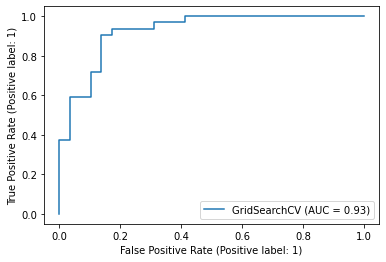

In [43]:
# plot ROC curve and calculate AUC score
plot_roc_curve(log_reg, x_test, y_test);

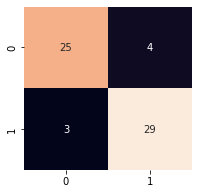

In [44]:
fig, ax=  plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                 annot=True,
                 cbar=False)
plt.xlabel = "True label"
plt.ylabel = "Predicited label"

Now we got ROC curve , AUC mertic and confusion matrix , Now let's get classification report , Precision, Accuracy, F1-score.

In [45]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evalution matrices using cross-validation

we are going to calculate accuracy, Precision, Recall, and F1-score using cross-validation

In [46]:
# check best parameters
log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [58]:
# create a new classifier with best parameters
clf  = LogisticRegression(C=0.20433597178569418,
                          solver= 'liblinear')
# clf.fit(x_train, y_train)

In [59]:
# cross-validated accuracy
crr_acc = cross_val_score(clf,
                          x_train,
                          y_train,
                          cv=5, 
                          scoring="accuracy")
crr_acc = np.mean(crr_acc)
crr_acc


0.8305272108843538

In [60]:
#cross-validated precison
crr_pre = cross_val_score(clf,
                          x_train,
                          y_train,
                          cv=5,
                          scoring='precision')
crr_pre  =np.mean(crr_pre)
crr_pre

0.8156825852946541

In [61]:
#cross-validated recall
crr_rec = cross_val_score(clf, x_train, y_train, cv=5, scoring='recall')
crr_rec = np.mean(crr_rec)
crr_rec

0.8945868945868944

In [62]:
#cross-validated f1
crr_f1 = cross_val_score(clf,x_train,y_train, cv=5, scoring='f1')
crr_f1 = np.mean(crr_f1)
crr_f1

0.8527860395821953

<AxesSubplot:title={'center':'cross validated classification matrices'}>

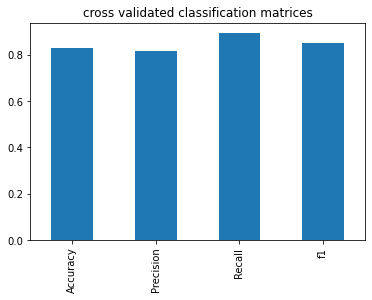

In [68]:
crr_metrics = pd.DataFrame({'Accuracy':crr_acc,
                            'Precision':crr_pre,
                            'Recall':crr_rec,
                            'f1':crr_f1},
                             index=[0])
crr_metrics.T.plot.bar(title='cross validated classification matrices', legend=False)

# Feature Impotrance

* Features importance tells about the which feature contribute the most to the outcomes of the model and how did they contribute?

* Let's find the feature importance for our LogisticRegression Model....

In [73]:
# Find the instance of logisticRegression....
clf = LogisticRegression(C=0.20433597178569418, 
                         solver='liblinear')
clf.fit(x_train, y_train);

In [74]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [75]:
# Match coef's of features with columns
feature = dict(zip(df.columns, list(clf.coef_[0])))
feature

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

<AxesSubplot:title={'center':'feature importance'}>

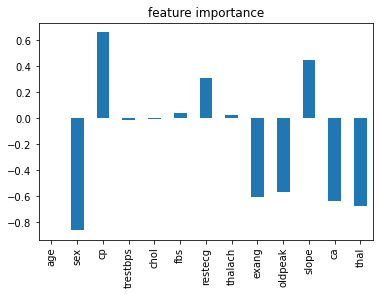

In [77]:
# visualise feature importacne
feature_df = pd.DataFrame(feature, index=[0])
feature_df.T.plot.bar(title='feature importance', legend=False)

In [78]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [80]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
